In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Step 1: Input data
data = np.array([
    [1.0, 1.0],
    [1.5, 2.0],
    [3.0, 4.0],
    [5.0, 7.0],
    [3.5, 5.0],
    [4.5, 5.0],
    [3.5, 4.5]
])

# Initial centroids (point 1 and point 4)
centroids = np.array([
    [1.0, 1.0],
    [5.0, 7.0]
])



In [3]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        points = data[clusters == i]
        mean = points.mean(axis=0)
        new_centroids.append(mean)
    return np.array(new_centroids)



Iteration 1:
Centroids:
 [[1.83333333 2.33333333]
 [4.125      5.375     ]]
Cluster assignments: [0 0 0 1 1 1 1]

Iteration 2:
Centroids:
 [[1.25 1.5 ]
 [3.9  5.1 ]]
Cluster assignments: [0 0 1 1 1 1 1]

Iteration 3:
Centroids:
 [[1.25 1.5 ]
 [3.9  5.1 ]]
Cluster assignments: [0 0 1 1 1 1 1]



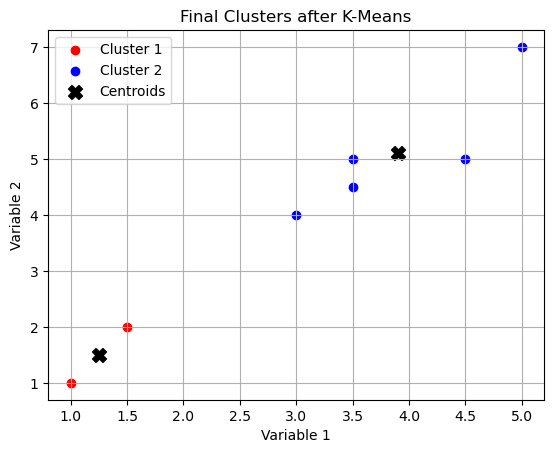

In [4]:
# K-means loop
k = 2
iterations = 0
while True:
    clusters = assign_clusters(data, centroids)
    new_centroids = update_centroids(data, clusters, k)
    print(f"Iteration {iterations + 1}:")
    print("Centroids:\n", new_centroids)
    print("Cluster assignments:", clusters)
    print()

    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids
    iterations += 1

# Plot final clusters
colors = ['r', 'b']
for i in range(k):
    points = data[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.title("Final Clusters after K-Means")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.legend()
plt.grid(True)
plt.show()
